In [1]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
from tensorflow.keras.utils import Sequence

Using TensorFlow backend.


In [2]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
#     Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='sigmoid')
])
model.compile(optimizer= RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
model.summary()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
__________________________________________

In [3]:
TRAINING_DIR = "Documents/Case_Study/Face Mask Detection Problem/Dataset/train"

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=24, 
                                                    target_size=(150, 150))

VALIDATION_DIR = "Documents/Case_Study/Face Mask Detection Problem/Dataset/test"

validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=24, 
                                                         target_size=(150, 150))

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [4]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [5]:
history = model.fit_generator(train_generator,
                              epochs = 20,
                              steps_per_epoch = 54,
                              validation_data = validation_generator,
                              validation_steps = 54,
                              callbacks=[checkpoint])

model.save('model-100.h5')
print("model saved as model-100.h5")


Epoch 1/20
54/54 [==============================] - 87s 2s/step - loss: 0.6733 - acc: 0.6559 - val_loss: 1.0917 - val_acc: 0.6521
Epoch 2/20
54/54 [==============================] - 70s 1s/step - loss: 0.4072 - acc: 0.8485 - val_loss: 0.2367 - val_acc: 0.8883
Epoch 3/20
54/54 [==============================] - 72s 1s/step - loss: 0.3012 - acc: 0.8911 - val_loss: 0.0534 - val_acc: 0.9905
Epoch 4/20
54/54 [==============================] - 59s 1s/step - loss: 0.3393 - acc: 0.8808 - val_loss: 0.0462 - val_acc: 0.9785
Epoch 5/20
54/54 [==============================] - 59s 1s/step - loss: 0.2678 - acc: 0.8940 - val_loss: 0.0454 - val_acc: 0.9897
Epoch 6/20
54/54 [==============================] - 61s 1s/step - loss: 0.2467 - acc: 0.9092 - val_loss: 0.0767 - val_acc: 0.9691
Epoch 7/20
54/54 [==============================] - 60s 1s/step - loss: 0.2210 - acc: 0.9226 - val_loss: 0.0230 - val_acc: 1.0000
Epoch 8/20
54/54 [==============================] - 60s 1s/step - loss: 0.2083 - acc: 0.9

Text(0.5, 1.0, 'Training and validation loss')

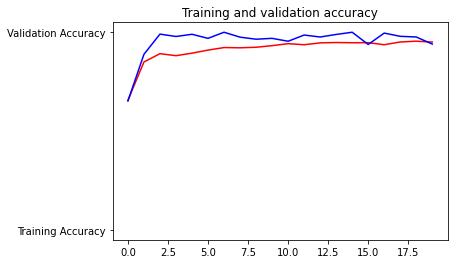

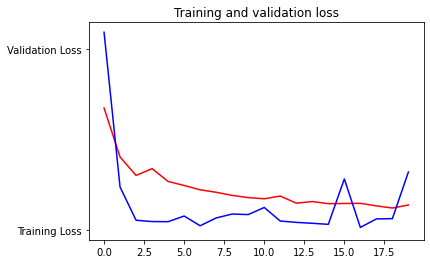

In [6]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [25]:
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from keras.models import load_model
 
# # load and prepare the image
# def load_image(filename):
# 	# load the image
# 	img = load_img('Images/face_mask1.jpg', target_size=(32, 32))
# 	# convert to array
# 	img = img_to_array(img)
# 	# reshape into a single sample with 3 channels
# 	img = img.reshape(1, 32, 32, 3)
# 	# prepare pixel data
# 	img = img.astype('float32')
# 	img = img / 255.0
# 	return img

In [28]:
# # load an image and predict the class
# def run_example():
# 	# load the image
# 	img = load_image('Images/face_mask1.jpg')
# 	# load model
# 	# model = load_model('final_model.h5')
# 	# predict the class
# 	result = model.predict_classes(img)
# 	print(result[0])
 
# #      entry point, run the example
# run_example()

In [29]:
# import numpy as np
# from jupyter import files
# from keras.preprocessing import image
# # import fileupload

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#     path = '/content/' + fn
#     img = image.load_img(path, target_size=(150, 150))
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)

#     images = np.vstack([x])
#     classes = model.predict(images, batch_size=10)
#     print(classes[0])
#     if classes[0]>0.5:
#         print(fn + "With Mask")
#     else:
#         print(fn + "Without Mask")

In [10]:
import cv2
import numpy as np
from keras.models import load_model

model = load_model("model-100.h5")
results = {0:'without mask',1:'mask'}
GR_dict = {0:(0,0,255),1:(0,255,0)}
rect_size = 4

cap = cv2.VideoCapture(0) 
haarcascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    (rval, im) = cap.read()
    im = cv2.flip(im,1,1) 
    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized = cv2.resize(face_img,(150,150))
        normalized = rerect_sized/255.0
        reshaped = np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result = model.predict(reshaped)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    
    if key == 27: 
        break
cap.release()
cv2.destroyAllWindows()

In [8]:
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

In [9]:
model = load_model("model-100.h5")
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor = 1.1,
        minNeighbors = 5,
        minSize = (30, 30),
        flags = cv2.CASCADE_SCALE_IMAGE)
    
    faces_list = []
    preds = []
    
    for (x,y,w,h) in faces:
        face_frame = frame[y: y + h, x: x + w]
        face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
        face_frame = cv2.resize(face_frame, (150, 150))
        face_frame = img_to_array(face_frame)
        face_frame = np.expand_dims(face_frame, axis=0)
        face_frame = preprocess_input(face_frame)
        faces_list.append(face_frame)
        
        if len(faces_list) > 0:
            preds = model.predict(faces_list)
            
        for pred in preds:
            (mask, withoutMask) = pred
            
        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
        
        cv2.putText(frame, label, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
 
        cv2.rectangle(frame, (x, y), (x + w, y + h),color, 2)
    
        # Display the resulting frame
    cv2.imshow('Video', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
video_capture.release()
cv2.destroyAllWindows()

# Extract Text From Images

In [20]:
from tkinter import *
from tkinter import filedialog
from PIL import ImageTk, Image
import cv2
import pytesseract 

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'
 
root = Tk()
root.title('Text Analyzer from Image') 
newline = Label(root)
uploaded_img=Label(root)
scrollbar = Scrollbar(root)
scrollbar.pack( side = RIGHT, fill = Y )

def extract(path):
    Actual_image = cv2.imread(path)
    Sample_img = cv2.resize(Actual_image,(400,350))
    Image_ht,Image_wd,Image_thickness = Sample_img.shape
    Sample_img = cv2.cvtColor(Sample_img,cv2.COLOR_BGR2RGB)
    texts = pytesseract.image_to_data(Sample_img) 
    mytext = ""
    prevy=0
    for cnt,text in enumerate(texts.splitlines()):
        if cnt==0:
            continue
        text = text.split()
        if len(text)==12:
            x,y,w,h = int(text[6]),int(text[7]),int(text[8]),int(text[9])
            if(len(mytext)==0):
                prey=y
            if(prevy-y>=10 or y-prevy>=10):
                print(mytext)
                Label(root,text=mytext,font=('Times',15,'bold')).pack()
                mytext=""
            mytext = mytext + text[11]+" "
            prevy=y
    Label(root,text=mytext,font=('Times',15,'bold')).pack()
    
def show_extract_button(path):
    extractBtn= Button(root,text="Extract text",command=lambda: extract(path),bg="#2f2f77",fg="gray",pady=15,padx=15,font=('Times',15,'bold'))
    extractBtn.pack()
    
def upload():
    try:
        path = filedialog.askopenfilename()
        image = Image.open(path)
        img = ImageTk.PhotoImage(image)
        uploaded_img.configure(image=img)
        uploaded_img.image = img
        show_extract_button(path)
    except:
        pass  
uploadbtn = Button(root,text="Upload an image",command=upload,bg="#2f2f77",fg="gray",height=2,width=20,font=('Times',15,'bold')).pack()
newline.configure(text='\n')
newline.pack()
uploaded_img.pack()
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Kartik\Anaconda3\lib\site-packages\pytesseract\pytesseract.py", line 352, in get_tesseract_version
    env=environ,
  File "C:\Users\Kartik\Anaconda3\lib\subprocess.py", line 395, in check_output
    **kwargs).stdout
  File "C:\Users\Kartik\Anaconda3\lib\subprocess.py", line 472, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Kartik\Anaconda3\lib\subprocess.py", line 775, in __init__
    restore_signals, start_new_session)
  File "C:\Users\Kartik\Anaconda3\lib\subprocess.py", line 1178, in _execute_child
    startupinfo)
FileNotFoundError: [WinError 2] The system cannot find the file specified

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Kartik\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-20-2e248b92e363>", line 41, in <lambda>
    extractB

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Kartik\Anaconda3\lib\site-packages\pytesseract\pytesseract.py", line 352, in get_tesseract_version
    env=environ,
  File "C:\Users\Kartik\Anaconda3\lib\subprocess.py", line 395, in check_output
    **kwargs).stdout
  File "C:\Users\Kartik\Anaconda3\lib\subprocess.py", line 472, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Kartik\Anaconda3\lib\subprocess.py", line 775, in __init__
    restore_signals, start_new_session)
  File "C:\Users\Kartik\Anaconda3\lib\subprocess.py", line 1178, in _execute_child
    startupinfo)
FileNotFoundError: [WinError 2] The system cannot find the file specified

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Kartik\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-20-2e248b92e363>", line 41, in <lambda>
    extractB

In [24]:
import os 
  
fileitem = form['filename'] 
  
# check if the file has been uploaded 
if fileitem.filename: 
    # strip the leading path from the file name 
    fn = os.path.basename(fileitem.filename) 
      
   # open read and write the file into the server 
    open(fn, 'wb').write(fileitem.file.read())

NameError: name 'form' is not defined